# Frequência e Distribuição de Crises

Nesse notebook vamos explorar as crises econômicas que os países da Africa enfrentam nesses últimos anos.

**Por que fazer?**: Entender onde e quando as crises ocorreram pode revelar padrões históricos e identificar períodos críticos.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Importar o dataset
data = pd.read_csv('data/african_econ_crises.csv')

In [ ]:
data.shape

In [ ]:
data.columns

In [10]:
data.head()

,case,cc3,country,year,systemic_crisis,exch_usd,domestic_debt_in_default,sovereign_external_debt_default,gdp_weighted_default,inflation_annual_cpi,independence,currency_crises,inflation_crises,banking_crisis
0,1,DZA,Algeria,1870,1,0.052264,0,0,0.0,3.441456,0,0,0,crisis
1,1,DZA,Algeria,1871,0,0.052798,0,0,0.0,14.149140,0,0,0,no_crisis
2,1,DZA,Algeria,1872,0,0.052274,0,0,0.0,-3.718593,0,0,0,no_crisis
3,1,DZA,Algeria,1873,0,0.051680,0,0,0.0,11.203897,0,0,0,no_crisis
4,1,DZA,Algeria,1874,0,0.051308,0,0,0.0,-3.848561,0,0,0,no_crisis


In [ ]:
# Exibindo a quantidade de crises ocorridas em cada país 
[data.country.value_counts(), data.country.unique()]

### Evolução da taxa de cambio ao longo dos anos

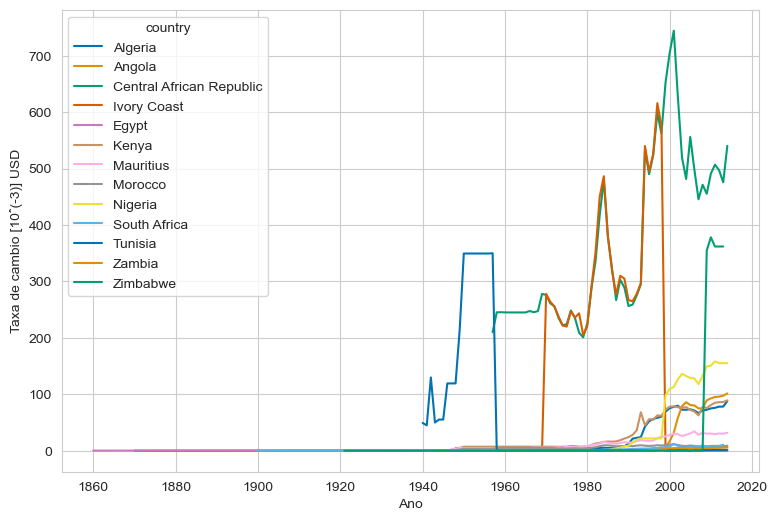

In [45]:
sns.set_style('whitegrid')
plt.figure(figsize = (9,6))

sns.lineplot(
    x = 'year',
    y = 'exch_usd',
    hue = 'country',
    data = data,
    palette = 'colorblind'
)

plt.xlabel('Ano')
plt.ylabel('Taxa de cambio [10ˆ(-3)] USD')
display()

**Observações:**
1. Alguns países têm taxas de câmbio relativamente mais baixas do que outros países. Países como África do Sul, Zâmbia, Egito e Marrocos têm taxas de câmbio relativamente mais baixas (é difícil interpretar com o gráfico acima, mas vamos detalhar a taxa de câmbio de cada país no próximo gráfico)
2. A taxa de câmbio é quase zero para todos os países antes de 1940. Isto pode dever-se ao fato de o valor não estar registado ou de uma nova moeda ter sido adoptada recentemente pelos países. **(Análise adicional necessária)**
3. Há enormes picos na taxa de câmbio em Angola e no Zimbabué. Isto pode indicar um colapso económico.
### Taxa de cambio ao longo do tempo

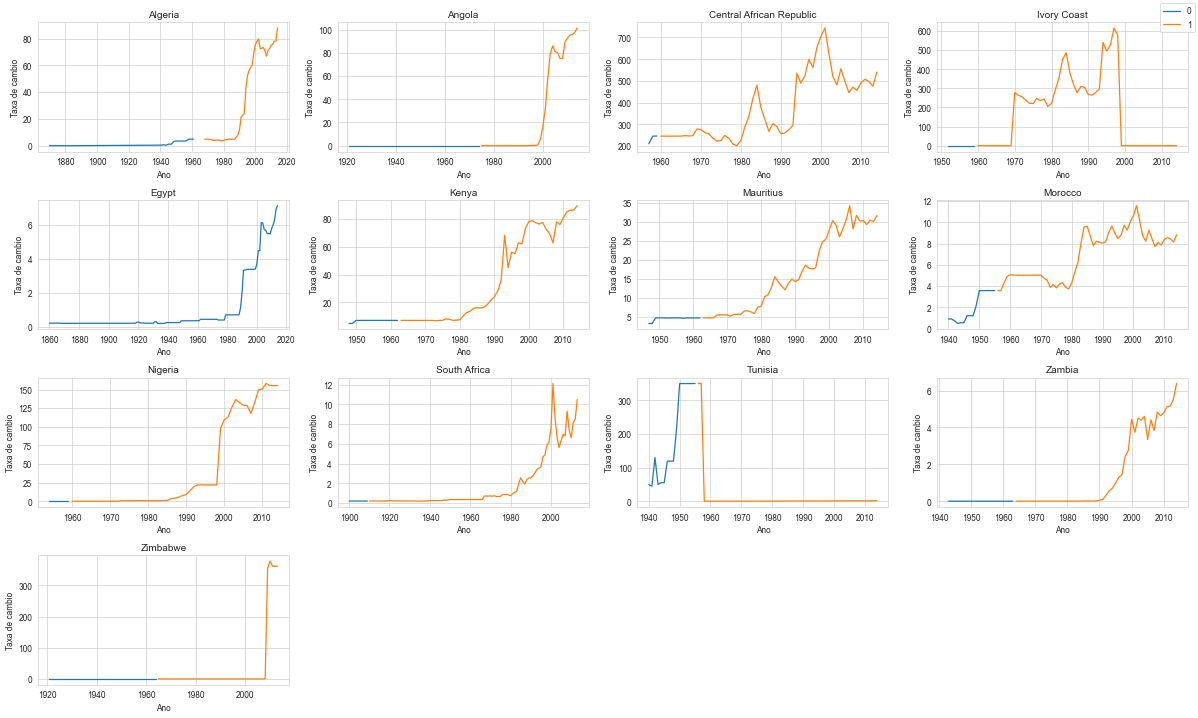

In [35]:
# Taxa de cambio de cada pais ao longo do tempo
sns.set_style('whitegrid'), 
fig, axes = plt.subplots(ncols=4, nrows=4, figsize=(20,12), dpi=60)
axes = axes.flatten()

for country, ax in zip(data['country'].unique(), axes):
    sns.lineplot(
        x = 'year',
        y = 'exch_usd',
        hue = 'independence',
        data = data[data['country'] == country],
        ax = ax
    )
    
    ax.set_xlabel('Ano')
    ax.set_ylabel('Taxa de cambio')
    ax.set_title('{}'.format(country))
    ax.get_legend().remove()

handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, loc=1)
fig.subplots_adjust(top=0.95)

# Apaga os subplots que ficariam em branco
for i in range(13,16):
  fig.delaxes(axes[i])

plt.tight_layout()

**Observações:**
1. Todos os países tinham uma boa taxa de câmbio antes da independência. Isso porque a maioria dos países optou por um novo sistema monetário após a independência. Por exemplo, o dinar tunisino foi introduzido em 1960 e o dinar argelino foi introduzido em 1964.
2. O Egito é um país independente desde 1850. No entanto, sua taxa de câmbio começou a aumentar a partir da década de 1970. Consideremos o Egipto como um caso especial em relação à independência.
3. A taxa de câmbio subiu após a independência para quase todos os países, exceto a Tunísia. Excepto a Tunísia e a Costa do Marfim, a taxa de câmbio de todos os países tem aumentado desde a independência, com algumas flutuações.
4. Existem alguns picos repentinos na taxa de câmbio. Kwanza angolano - Em 1999, foi introduzida em Angola uma segunda moeda chamada kwanza e desde cedo sofreu com uma inflação elevada (Wikipedia). O dinar tunisino foi introduzido em 1960, daí um aumento.
### Hiperinflação

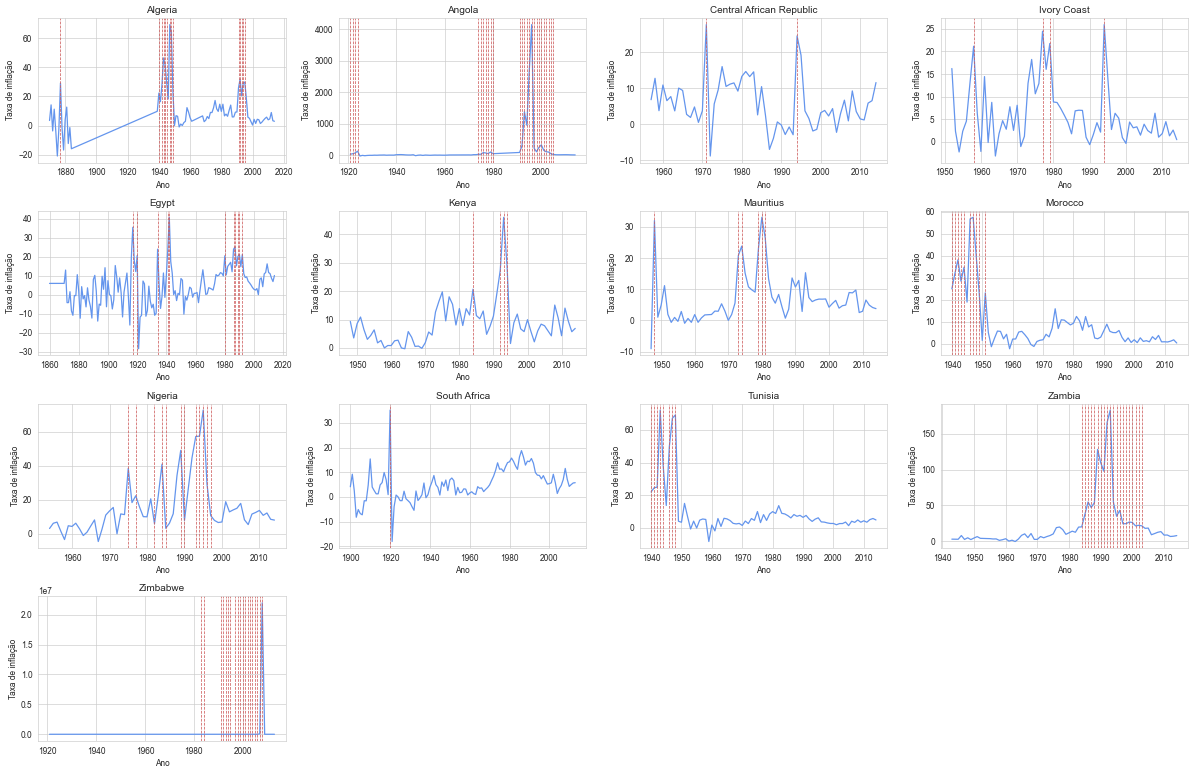

In [44]:
 # Hiperinflação
sns.set_style('whitegrid')
fig, axes = plt.subplots(ncols=4, nrows=4, figsize=(20, 13), dpi=60)
axes = axes.flatten()

for country, ax in zip(data['country'].unique(), axes):
    sns.lineplot(
        x = 'year',
        y = 'inflation_annual_cpi',
        data = data[data['country'] == country],
        ax = ax,
        color = 'cornflowerblue',
    )

    ax.set_xlabel('Ano')
    ax.set_ylabel('Taxa de inflação')
    ax.set_title('{}'.format(country))

    # Aqui selecionamos as linhas que pertecem ao pais da vez que tambem estavam em crise
    # Dessas linhas extraímos somente o ano.
    inflation = data[(data['country'] == country) & (data['inflation_crises'] == 1)][
        'year'
    ].unique() 
    # unique() aqui é só para retornar os anos como um array de valores unicos e nao como um array de series

    # Nos anos que houve inflação, adicionamos uma linha vertical no grafico
    for i in inflation:
        ax.axvline(x=i, color='indianred', linestyle='--', linewidth=0.9)
        
fig.subplots_adjust(top=0.95)

# Apaga os subplots que ficariam em branco
for country in range(13, 16):
    fig.delaxes(axes[country])
    
plt.tight_layout()

**Observações:**
1. As linhas pontilhadas representam momentos de crise inflacionária.
2. É óbvio que sempre que há uma taxa de inflação mais elevada provoca uma crise inflacionária. Embora os gráficos para países como Angola e Zimbábue mostrem uma crise de inflação mesmo quando a taxa de inflação é relativamente mais baixa porque o eixo y (taxa de inflação) para Angola já é muito mais elevado e a taxa de inflação mais alta do Zimbábue é de 20 milhões, por isso o gráfico não conseguiu para capturá-lo.
3. Angola e Zimbábue e Zambia sofreram mais inflações em comparação com todos os outros países africanos.
### Relação entre a taxa de cambio e a taxa de inflação

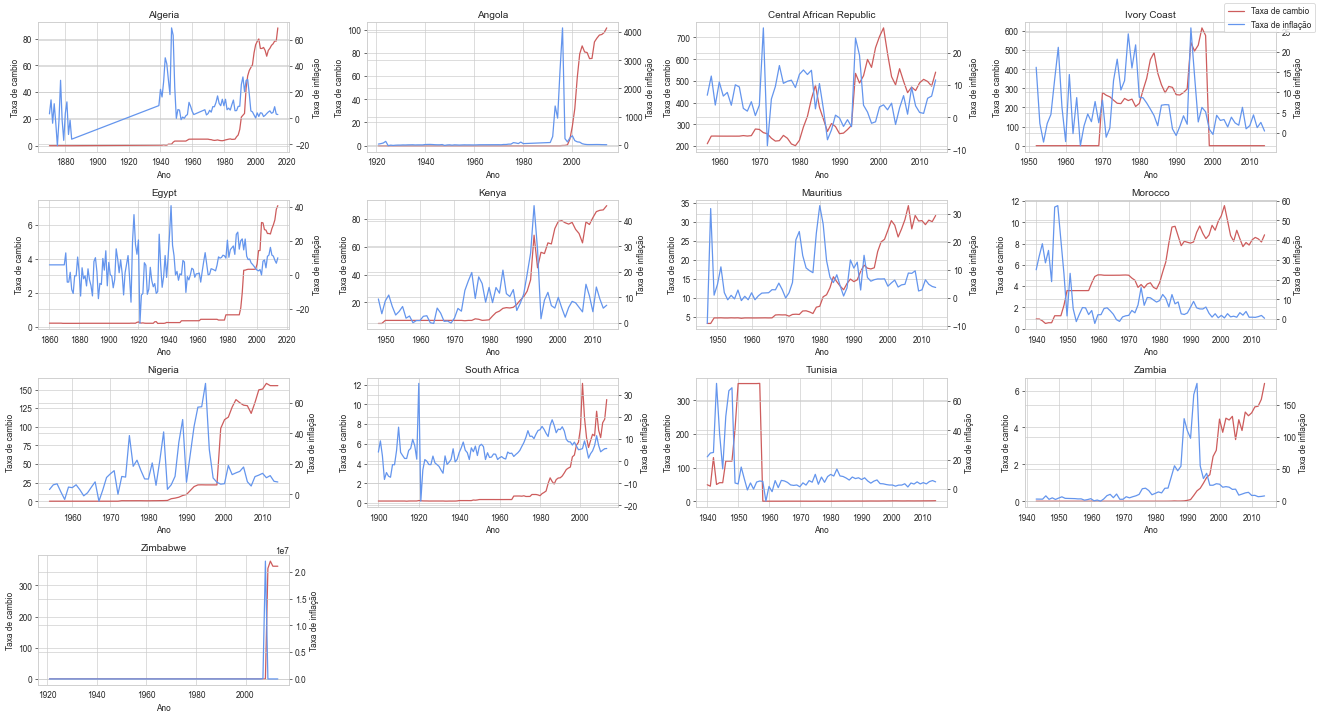

In [46]:
# Relação entre a taxa de cambio e a taxa de inflação
fig, axes = plt.subplots(ncols=4, nrows=4, figsize=(22, 12), dpi=60)
axes = axes.flatten()

for country, ax in zip(data['country'].unique(), axes):
    sns.lineplot(
        x='year',
        y='exch_usd',
        data=data[data['country'] == country],
        ax=ax,
        color='indianred',
        label='Taxa de cambio',
    )

    # Adiciona uma outra linha gemea ao grafico
    ax2 = ax.twinx()

    sns.lineplot(
        x='year',
        y='inflation_annual_cpi',
        data=data[data['country'] == country],
        ax=ax2,
        color='cornflowerblue',
        label='Taxa de inflação',
    )

    ax.set_xlabel('Ano')
    ax.set_ylabel('Taxa de cambio')
    ax.get_legend().remove()
    ax2.set_ylabel('Taxa de inflação')
    ax2.get_legend().remove()
    ax.set_title('{}'.format(country))

handles, labels = ax.get_legend_handles_labels()
handles2, labels2 = ax2.get_legend_handles_labels()
fig.legend(handles + handles2, labels + labels2, loc=1)
fig.subplots_adjust(top=0.95)

# Apaga os subplots que ficariam em branco
for i in range(13, 16):
    fig.delaxes(axes[i])
    
plt.tight_layout()

**Observação**
1. Não há nenhuma evidência visual que sustente a existência de uma relação entre a taxa de câmbio e a taxa de inflação.
2. Ocasionalmente, há um aumento repentino na taxa de câmbio após uma subida e descida acentuada da taxa de inflação. No entanto, isso só pode ser visto em países como Angola, Nigéria, Tunísia, Zâmbia e Zimbábue.